In [90]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
X_Features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DPF","Age"]
df = pd.read_csv("diabetes.csv")
v = df.values
x_train = v[:,:8]
y_train = v[:,8]

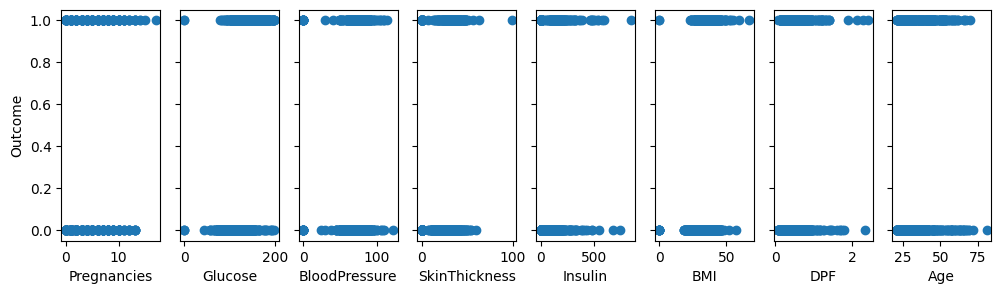

In [92]:
fig, ax = plt.subplots(1,8, figsize =(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(X_Features[i])
ax[0].set_ylabel("Outcome")
plt.show()

In [93]:
#Feature Engineering


In [94]:
#Normalization
def z_norm(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [95]:
def sigmoid(z):
    
    g = 1 / (1 + np.exp(-z))
    
    return g

In [96]:
#Compute Cost
def compute_cost(x,y,m,c):
    l, w = x.shape
    cost = 0
    for i in range(l):
        z = np.dot(x[i],m) + c
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1 - y[i]) * (np.log(1 - f_wb))
    cost /= l
    
    return cost
    

In [307]:
#Compute Gradient
def compute_gradient(x,y,m,c,lm):
    l, w = x.shape
    d_m = np.zeros((w,))
    d_c = 0
    for i in range(l):
        f_wb = sigmoid(np.dot(x[i],m) + c)
        err = f_wb - y[i]
        for j in range(w):
            d_m[j] += err * x[i,j] 
        d_c += err
        
    d_m /= l
    d_c /= l
    
    for j in range(w):
        d_m[j] += ((lm/l) * m[j])
    
    return d_m, d_c

In [308]:
#Gradient Descent
def gradient_descent(x,y,init_m, init_c, alpha, lm, iters, cost_function, gradient_function):
    m = copy.deepcopy(init_m)
    c = init_c
    cost_history = []
    
    for i in range(iters):
        d_m, d_c = gradient_function(x,y,m,c,lm)
        
        m = m - alpha * d_m
        c = c - alpha * d_c
        
        if i < 100000:
            if(i % math.ceil(iters/10) == 0):
                cost_history.append(cost_function(x,y,m,c))
                print(f"Iteration {i}: Cost {cost_history[-1]}")
                
    return m,c,cost_history

In [309]:
#Initialization 
l , w = x_train.shape
#X = np.c_[x_train, x_train[:,0]**2,x_train[:,1]**3,x_train[:,5]**2, x_train[:,3]**8]
X_norm, mu, sigma = z_norm(x_train)#x_train
init_m = np.zeros(w)
init_c = 0
alpha = 0.1
lm = 1
iters = 10000
m,c,cost_history = gradient_descent(X_norm, y_train, init_m, init_c, alpha, lm, iters, compute_cost, compute_gradient)
print(m,c)

Iteration 0: Cost 0.6805329129000138
Iteration 1000: Cost 0.47101455907437845
Iteration 2000: Cost 0.47101344480582763
Iteration 3000: Cost 0.47101344341149276
Iteration 4000: Cost 0.47101344340920615
Iteration 5000: Cost 0.47101344340920237
Iteration 6000: Cost 0.4710134434092024
Iteration 7000: Cost 0.4710134434092024
Iteration 8000: Cost 0.4710134434092024
Iteration 9000: Cost 0.4710134434092024
[ 0.40863995  1.10711315 -0.25088654  0.00906495 -0.13083746  0.69631328
  0.30883021  0.17651055] -0.86677591731547


In [310]:
#Prediction
l, w = x_train.shape
f_wb = np.zeros(l)
count = 0
for i in range(l):
    s = sigmoid(np.dot(X_norm[i],m) + c)
    if(s >= 0.5):
        f_wb[i] = 1
    else:
        f_wb[i] = 0

for i in range(l):
    if(f_wb[i] == y_train[i]):
        count += 1

print((count / l) * 100)

78.38541666666666


In [293]:
def all_features(x,i,norm_func):
    start= x[:,i]
    
   #n = np.c_[half, square, cube, fourth, fifth, sixth, seven, eight, ninth, tenth] #11
    n = np.c_[start,start**(1/2), start ** 2, start **3, start**4, start*5]
    #N = norm_func(n)
    return n

In [261]:
#"Pregnancies ^ 2","Glucose^3","BloodPressure","SkinThickness^5","Insulin^(1/2)","BMI^2","DPF^(1/2)","Age^(1/2)"

Iteration 0: Cost 0.6930468368516172
Iteration 1000: Cost 0.6927944594641483
Iteration 2000: Cost 0.6927944584933433
Iteration 3000: Cost 0.6927944575225671
Iteration 4000: Cost 0.6927944565518188
Iteration 5000: Cost 0.6927944555811005
Iteration 6000: Cost 0.692794454610409
Iteration 7000: Cost 0.6927944536397469
Iteration 8000: Cost 0.6927944526691138
Iteration 9000: Cost 0.6927944516985088
[-5.93665275e-17 -7.26877753e-18 -2.83297076e-15  3.14620714e-13
  2.20359952e-12 -2.96832637e-16] -1.5288873529797758e-18
